In [41]:
from keys import FTX_API_KEY, FTX_API_SECRET
import seaborn as sns
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utility_classes.correlation import Correlation, CSVManager
from utility_classes.historical_data_processor import FTXDataProcessor
import seaborn as sns 
import dateutil.parser as dp


In [54]:
# df_spot = CSVManager('/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_spots/BTC_historical_data.csv').change_resolution('5T', 'SPOT')
# df_perp = CSVManager('/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_perps/BTC-PERP_historical_data.csv').change_resolution('5T', 'PERP')

df_spot = CSVManager('/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_spots/BTMX_historical_data.csv').change_resolution('30T', 'SPOT')
df_perp = CSVManager('/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_perps/BTMX-PERP_historical_data.csv').change_resolution('30T', 'PERP')

df_perp.rename(columns={'open': 'perp_open', 'high': 'perp_high', 'low': 'perp_low', 'close': 'perp_close', 'volume': 'perp_volume'}, inplace=True)
df_spot.rename(columns={'open': 'spot_open', 'high': 'spot_high', 'low': 'spot_low', 'close': 'spot_close', 'volume': 'spot_volume'}, inplace=True)
                            
joint_df = pd.merge(df_perp, df_spot, how='inner', on=['timestamp'])

joint_df['spread_open'] = joint_df['perp_open'] - joint_df['spot_open']
joint_df['spread_open%'] = (joint_df['perp_open'] - joint_df['spot_open'])/joint_df['perp_open']*100

joint_df['spread_high'] = joint_df['perp_high'] - joint_df['spot_high']
joint_df['spread_high%'] = (joint_df['perp_high'] - joint_df['spot_high'])/joint_df['perp_high']*100

joint_df['spread_low'] = joint_df['perp_low'] - joint_df['spot_low']
joint_df['spread_low%'] =(joint_df['perp_low'] - joint_df['spot_low'])/joint_df['perp_low']*100

joint_df['spread_close'] = joint_df['perp_close'] - joint_df['spot_close']
joint_df['spread_close%'] = (joint_df['perp_close'] - joint_df['spot_close'])/joint_df['perp_close']*100

joint_df.drop(columns=['perp_open', 'spot_open', 'perp_high', 'spot_high', 'perp_low', 'spot_low', 'perp_close', 'spot_close'], inplace=True)
joint_df=joint_df.set_index('timestamp')
joint_df

,perp_volume,funding_rate,spot_volume,spread_open,spread_open%,spread_high,spread_high%,spread_low,spread_low%,spread_close,spread_close%
timestamp,,,,,,,,,,,
2019-10-25T04:30:00+00:00,1400.224045,-0.000044,0.000000,-0.00033,-0.503740,-0.00019,-0.289414,-0.00037,-0.572755,-0.00039,-0.603715
2019-10-25T05:00:00+00:00,1386.754386,-0.000050,0.000000,-0.00039,-0.603715,-0.00060,-0.919681,-0.00056,-0.869565,-0.00061,-0.939329
2019-10-25T05:30:00+00:00,0.877041,-0.000050,0.000000,-0.00061,-0.939329,-0.00028,-0.427090,-0.00025,-0.386757,-0.00022,-0.340189
2019-10-25T06:00:00+00:00,0.188411,-0.000143,0.000000,-0.00022,-0.340189,-0.00029,-0.446154,-0.00020,-0.309310,-0.00026,-0.400863
2019-10-25T06:30:00+00:00,0.181663,-0.000143,0.000000,-0.00026,-0.400863,-0.00022,-0.338357,-0.00026,-0.400863,-0.00027,-0.416217
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-02T21:30:00+00:00,85043.967104,0.000041,63056.285073,0.00063,0.049997,0.00329,0.259556,-0.00109,-0.086666,0.00257,0.203268
2021-04-02T22:00:00+00:00,89908.832655,0.000034,68371.970767,0.00257,0.203268,0.00289,0.228080,-0.00316,-0.251905,0.00184,0.145522
2021-04-02T22:30:00+00:00,78887.844369,0.000034,40408.388812,0.00184,0.145522,0.00072,0.056827,0.00132,0.104852,0.00291,0.230212


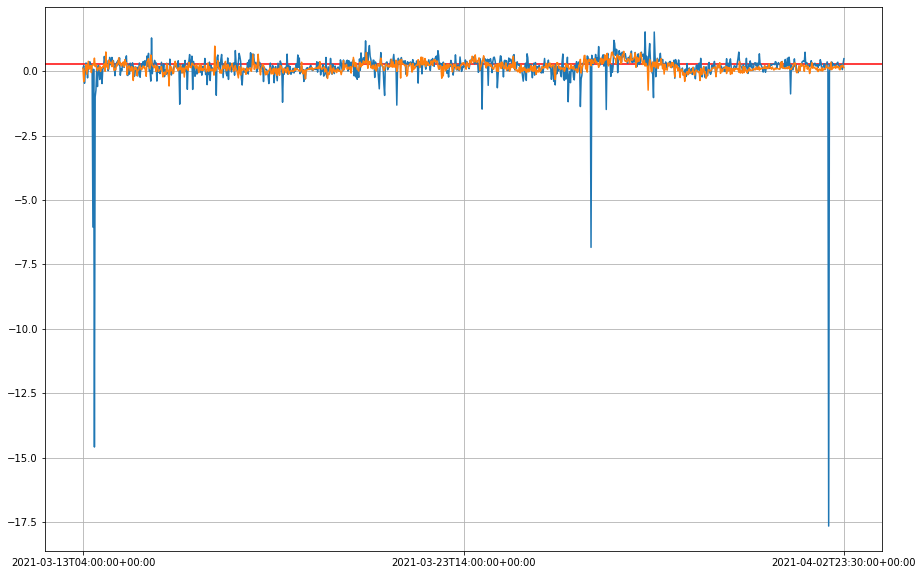

In [55]:
fig, ax = plt.subplots(figsize=(15,10))
spread_high=joint_df['spread_high%'].tail(1000)
spread_low=joint_df['spread_low%'].tail(1000)
spread_low=joint_df['spread_close%'].tail(1000)

ax.set_xticks([0, 500, 999])
ax.grid()
ax.axhline(y=0.28, color='r', linestyle='-')

ax.plot(spread_high)
ax.plot(spread_low)

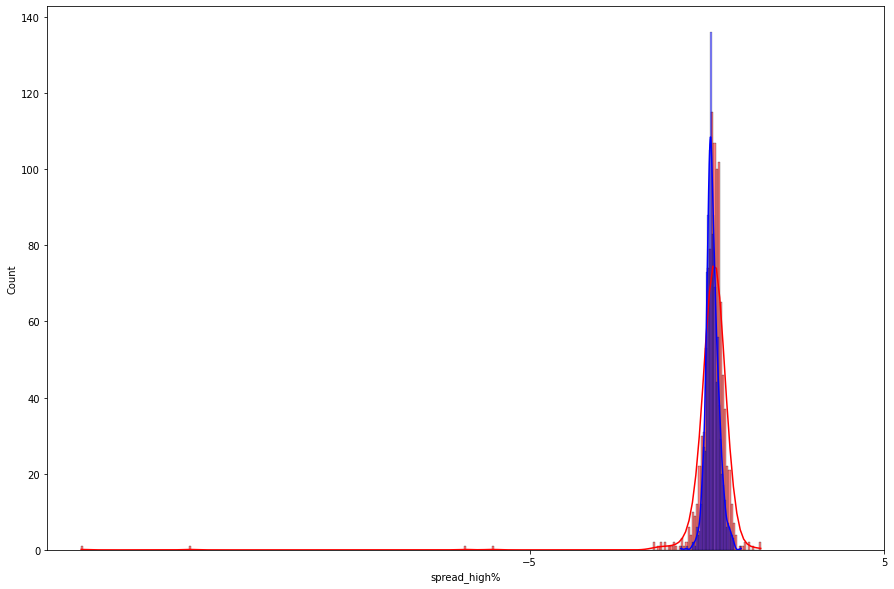

In [56]:
fig, ax = plt.subplots(figsize=(15,10))

sns.histplot(data=spread_high, color='r', kde=True)
# sns.histplot(data=spread_low, color='g', kde=True)
sns.histplot(data=spread_low, color='blue', kde=True)

ax.set_xticks([-5,5])

In [57]:
min_std = np.std(joint_df['spread_close%'].tail(9600))
min_std 

0.7349631171598979